<a href="https://colab.research.google.com/github/Asad123-creator/kaggle-project-/blob/main/22008852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# Load the data

train_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-group-23/kaggle-challenge/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0509-2023-group-23/kaggle-challenge/main/test.csv')

# Display the first few rows of the training dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Encode categorical variables
le = LabelEncoder()
for column in ['HomePlanet', 'Destination', 'Cabin', 'Name']:
    combined_df[column] = le.fit_transform(combined_df[column].astype(str))

# Split the combined dataset back into training and test sets
train_df = combined_df.iloc[:len(train_df), :]
test_df = combined_df.iloc[len(train_df):, :]

# Verify the encoding
print(train_df.head())
print(test_df.head())

NameError: name 'combined_df' is not defined

In [ ]:
scaler = StandardScaler()
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

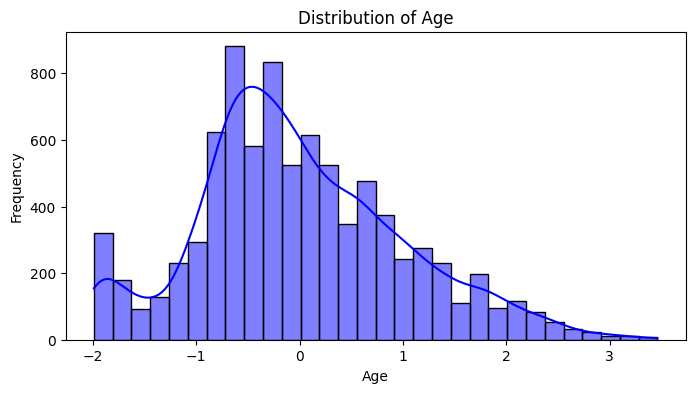


Description of Age:
count    8.514000e+03
mean     6.217458e-17
std      1.000059e+00
min     -1.989756e+00
25%     -6.783417e-01
50%     -1.261671e-01
75%      6.330730e-01
max      3.462968e+00
Name: Age, dtype: float64





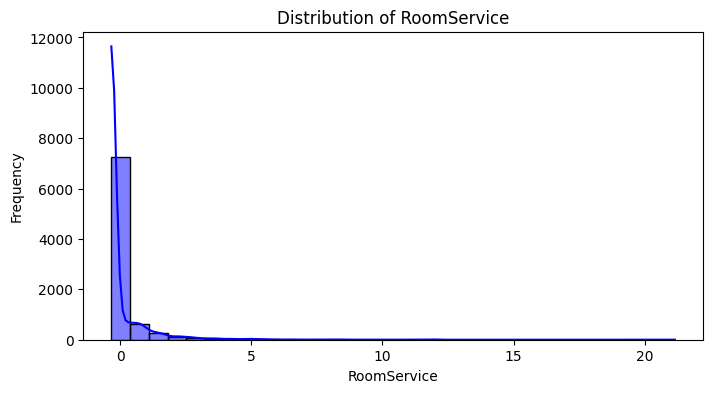


Description of RoomService:
count    8.512000e+03
mean    -1.419082e-17
std      1.000059e+00
min     -3.370254e-01
25%     -3.370254e-01
50%     -3.370254e-01
75%     -2.665267e-01
max      2.115309e+01
Name: RoomService, dtype: float64





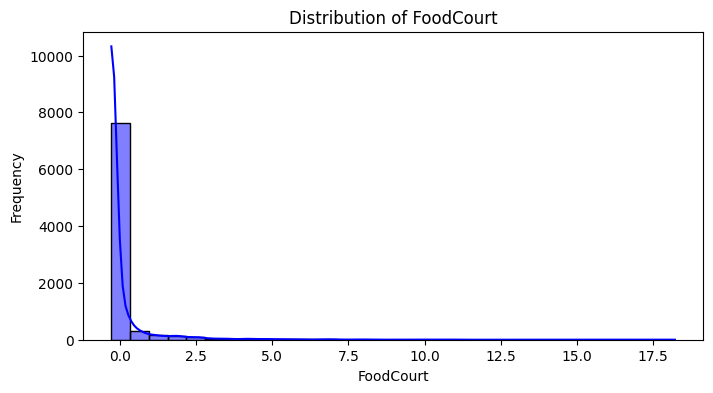


Description of FoodCourt:
count    8.510000e+03
mean    -1.669901e-17
std      1.000059e+00
min     -2.842738e-01
25%     -2.842738e-01
50%     -2.842738e-01
75%     -2.371097e-01
max      1.821709e+01
Name: FoodCourt, dtype: float64





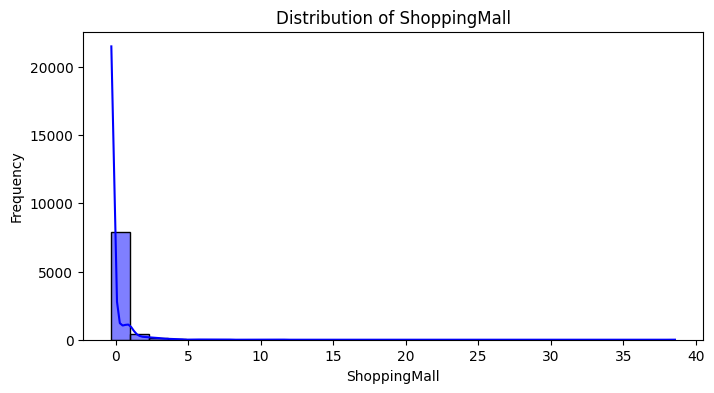


Description of ShoppingMall:
count    8.485000e+03
mean     5.443168e-18
std      1.000059e+00
min     -2.873167e-01
25%     -2.873167e-01
50%     -2.873167e-01
75%     -2.426636e-01
max      3.856422e+01
Name: ShoppingMall, dtype: float64





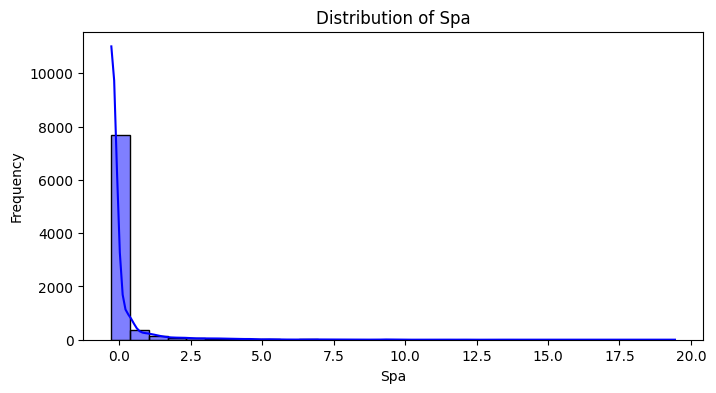


Description of Spa:
count    8.510000e+03
mean     2.087376e-17
std      1.000059e+00
min     -2.737359e-01
25%     -2.737359e-01
50%     -2.737359e-01
75%     -2.218284e-01
max      1.944053e+01
Name: Spa, dtype: float64





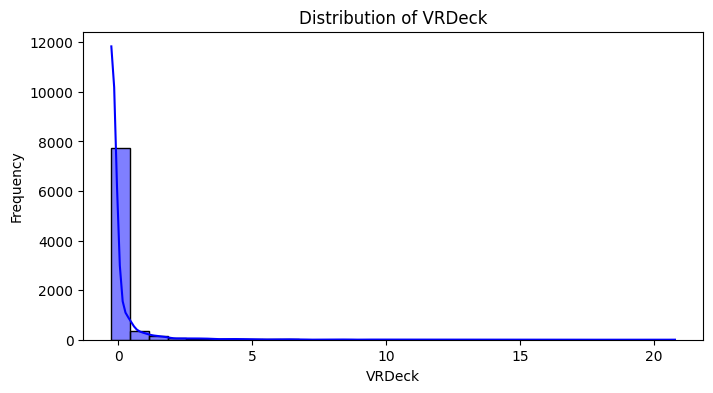


Description of VRDeck:
count    8505.000000
mean        0.000000
std         1.000059
min        -0.266098
25%        -0.266098
50%        -0.266098
75%        -0.225946
max        20.798803
Name: VRDeck, dtype: float64





In [ ]:
## Plot distribution of numerical features with detailed explanations
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[feature], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(f"\nDescription of {feature}:")
    print(train_df[feature].describe())
    print("\n\n")

<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


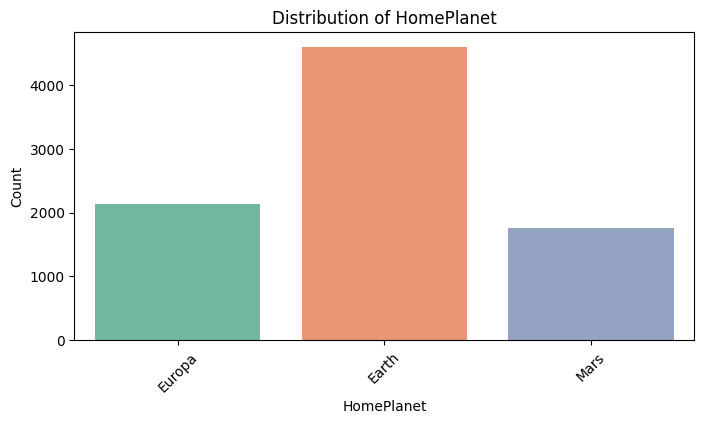

<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')



Description of HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64





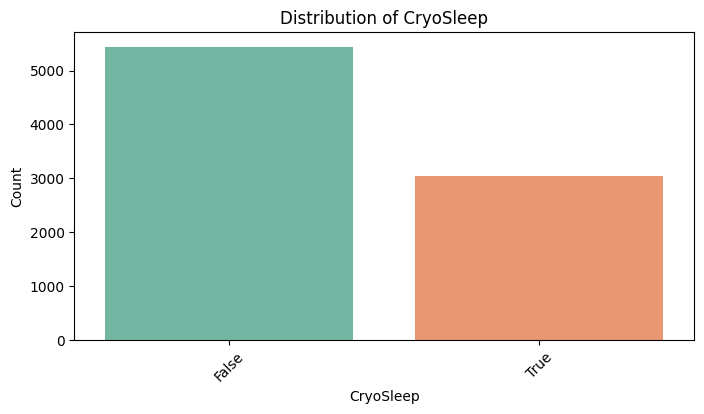


Description of CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64





<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


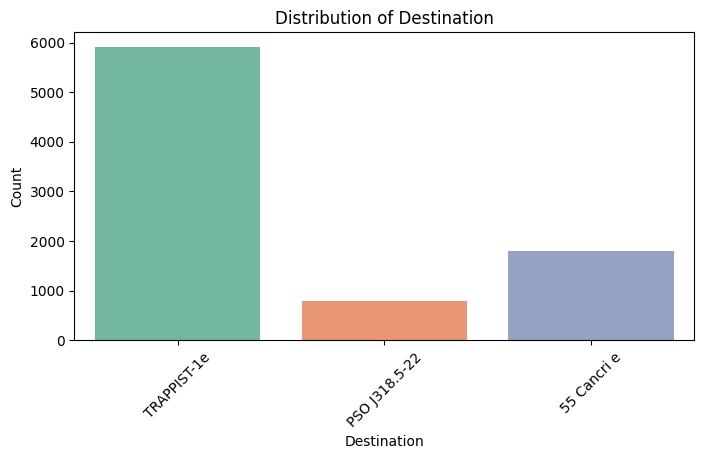


Description of Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64





<ipython-input-11-203ca5be1e95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='Set2')


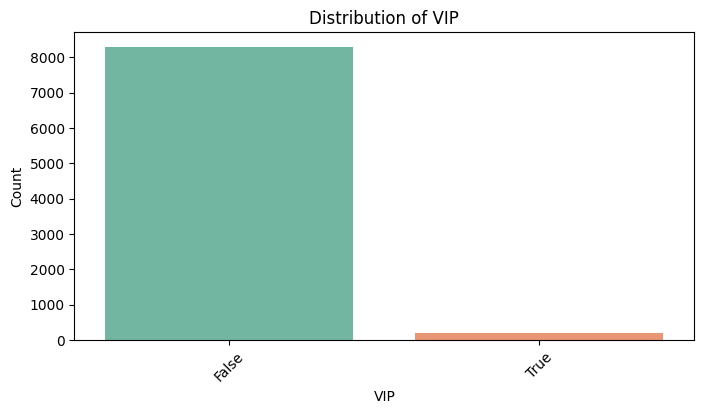


Description of VIP:
VIP
False    8291
True      199
Name: count, dtype: int64





In [ ]:
## Analyze categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print(f"\nDescription of {feature}:")
    print(train_df[feature].value_counts())
    print("\n\n")

<ipython-input-12-5b8743495bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')


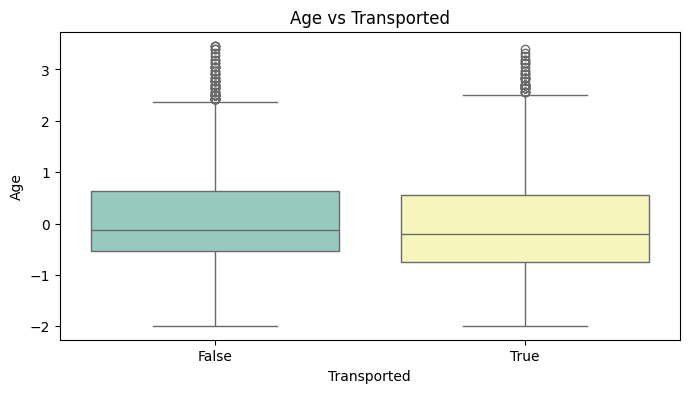

<ipython-input-12-5b8743495bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')


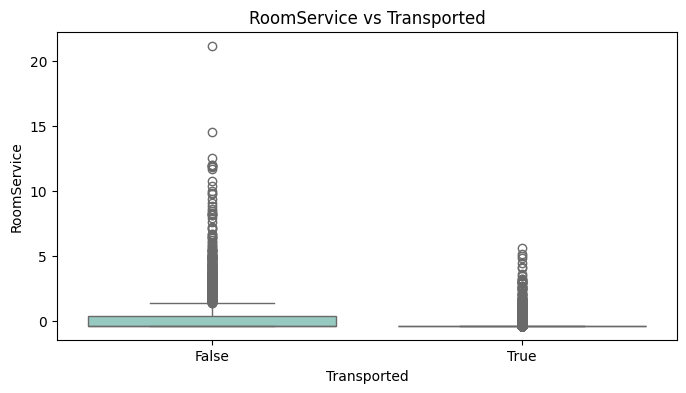

<ipython-input-12-5b8743495bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')


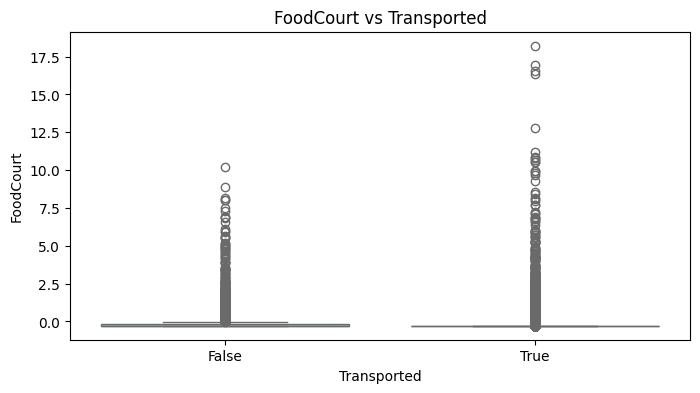

<ipython-input-12-5b8743495bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')


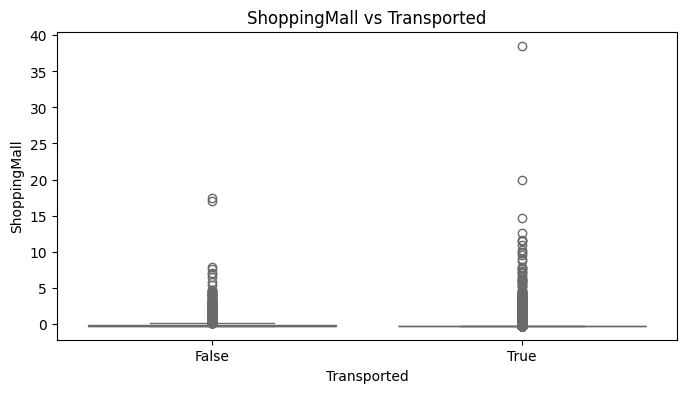

<ipython-input-12-5b8743495bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')


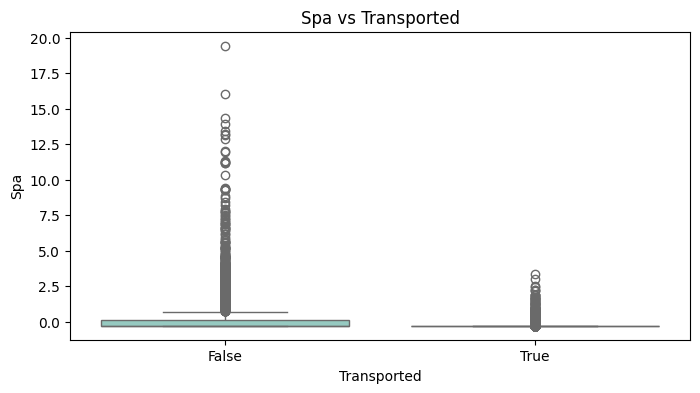

<ipython-input-12-5b8743495bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')


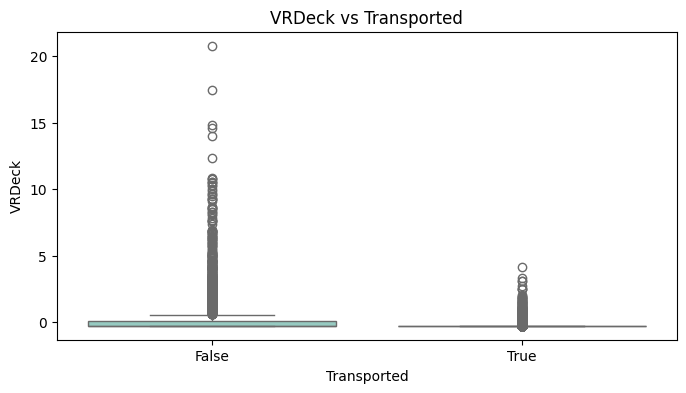

In [ ]:
## Analyze the relationship between features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x='Transported', y=feature, palette='Set3')
    plt.title(f'{feature} vs Transported')
    plt.xlabel('Transported')
    plt.ylabel(feature)
    plt.show()

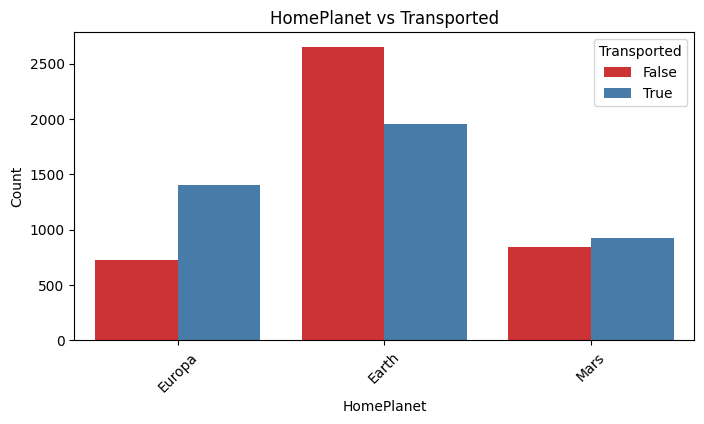

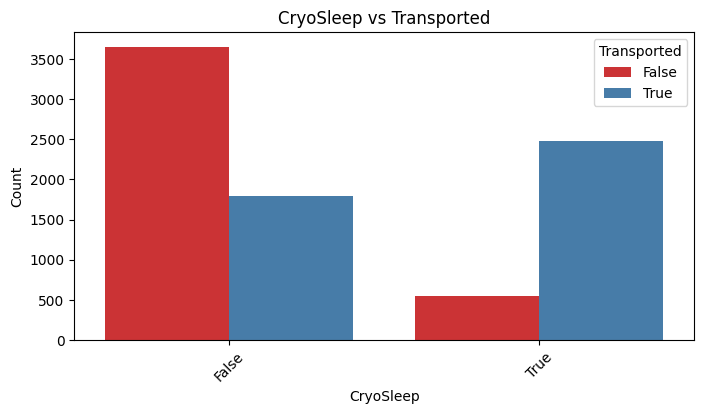

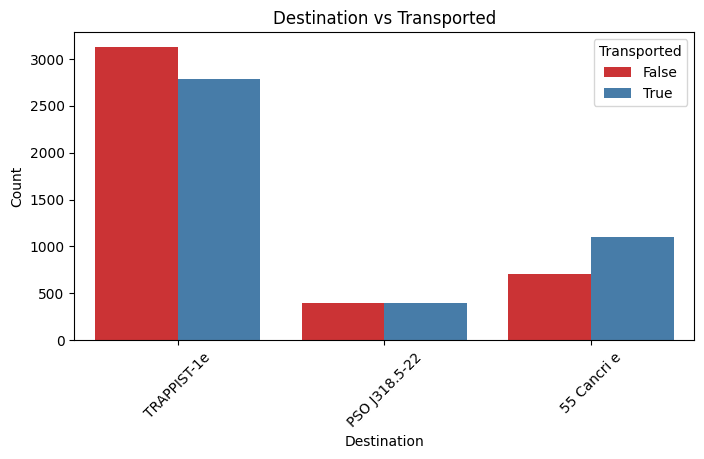

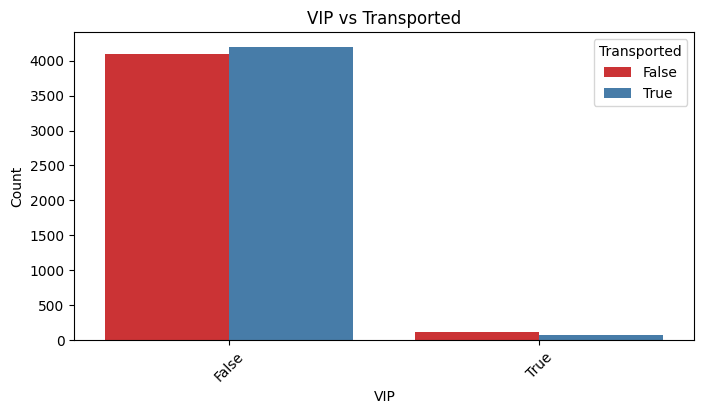

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, hue='Transported', palette='Set1')
    plt.title(f'{feature} vs Transported')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
## Correlation heatmap with enhanced details
plt.figure(figsize=(14, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Europa'

<Figure size 1400x1000 with 0 Axes>

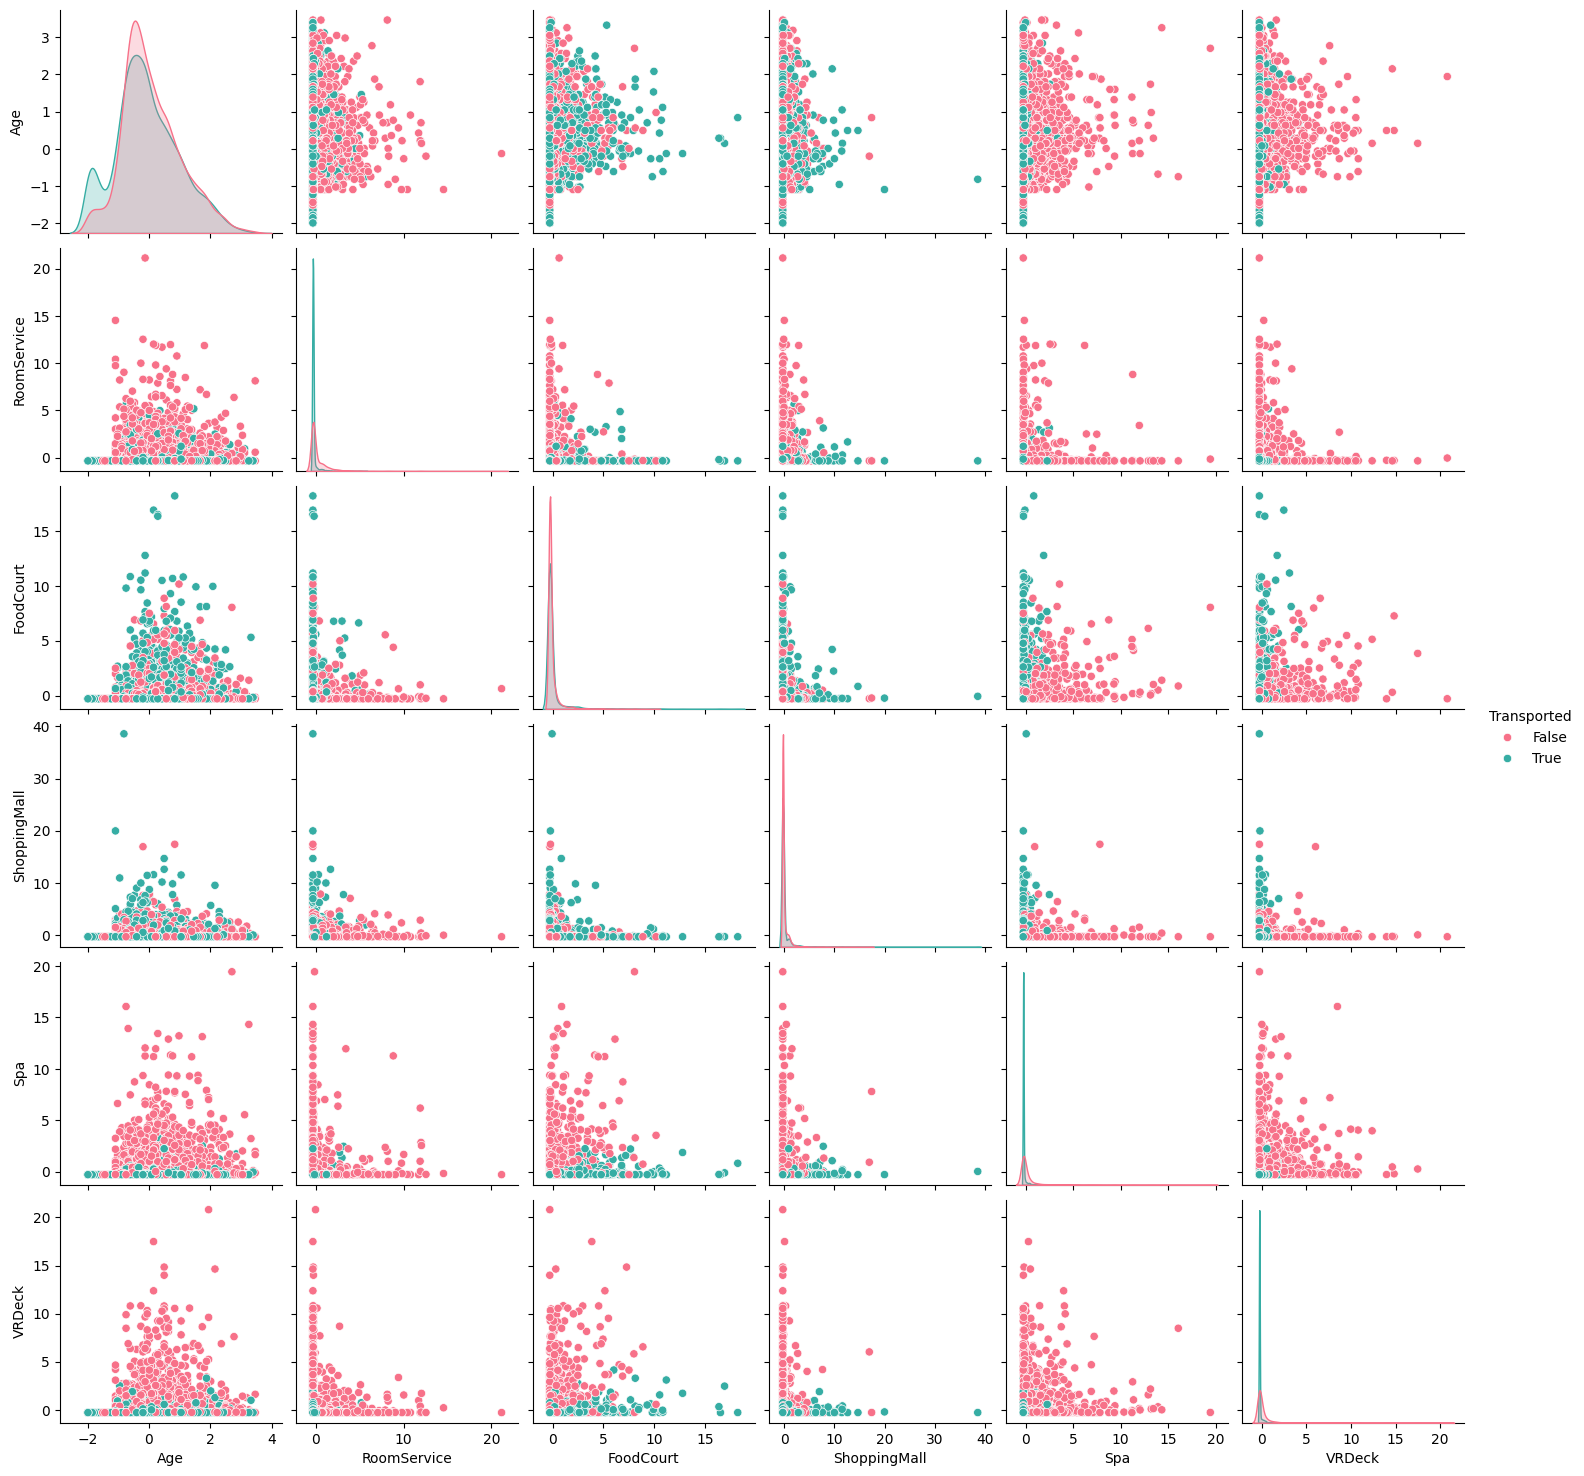

In [ ]:
## Pairplot for numerical features
sns.pairplot(train_df[numerical_features + ['Transported']], hue='Transported', palette='husl', diag_kind='kde')
plt.show()

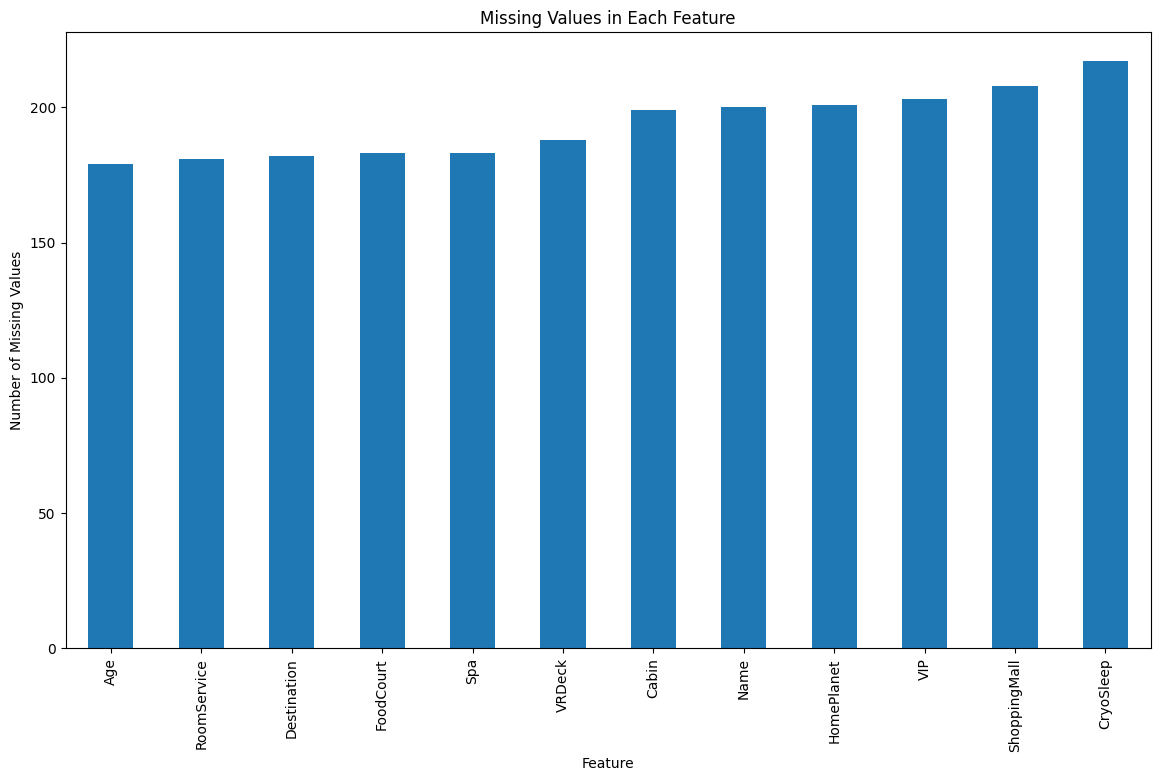

In [ ]:
# Analysis of missing values
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(14, 8))
    missing_values.sort_values(inplace=True)
    missing_values.plot.bar()
    plt.title('Missing Values in Each Feature')
    plt.xlabel('Feature')
    plt.ylabel('Number of Missing Values')
    plt.show()
else:
    print("No missing values in the dataset.")

In [ ]:
## Summary statistics for the entire dataset
print("Summary Statistics for the Training Dataset:")
print(train_df.describe(include='all'))

In [ ]:
# Additional plots for insights
# Distribution of Age by HomePlanet
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='HomePlanet', y='Age', palette='Set2')
plt.title('Age Distribution by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Age')
plt.show()

In [ ]:
# Count of VIP status by HomePlanet
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='HomePlanet', hue='VIP', palette='Set1')
plt.title('Count of VIP Status by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()